# Load the libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

## Access to Spotify API
This part sets up the Spotify API access by providing the client ID and client secret. It uses the SpotifyClientCredentials class from Spotipy to authenticate and create a Spotify client.

In [2]:
client_id = "8275ae5a64fc43dfa77675027d68c1df"
client_secret = "1ac1e6317aa840d5a50935ed1689535d" 

credmanager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credmanager)

# Demonstrating some features of Spotify API

This part demonstrates how to use the Spotify API to search for an artist, retrieve their information, and find related artists.

In [3]:
abdelhalim_search = sp.search('Abdel Halim Hafez', type='artist')['artists']['items'][0]
abdelhalim_search

{'external_urls': {'spotify': 'https://open.spotify.com/artist/6IW026WCYU8L1WF79dfwss'},
 'followers': {'href': None, 'total': 1137804},
 'genres': ['classic arab pop'],
 'href': 'https://api.spotify.com/v1/artists/6IW026WCYU8L1WF79dfwss',
 'id': '6IW026WCYU8L1WF79dfwss',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb8a09ed6b6710081bace4da41',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051748a09ed6b6710081bace4da41',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1788a09ed6b6710081bace4da41',
   'width': 160}],
 'name': 'Abdel Halim Hafez',
 'popularity': 47,
 'type': 'artist',
 'uri': 'spotify:artist:6IW026WCYU8L1WF79dfwss'}

## Searching Abdel Halim Hafez

Performs a search for the artist "Abdel Halim Hafez" using the sp.search function and retrieves the search results. It then extracts important features of the artist, such as name, ID, popularity, genre, and number of followers.

In [4]:
def artist_features(spotify_search_result):
    result = {
        'artist_name': spotify_search_result.get('name', 'artist_name_not_available'),
        'artist_id': spotify_search_result.get('id', 'artist_id_not_available'),
        'artist_popularity': spotify_search_result.get('popularity', 0),
        'artist_first_genre': (spotify_search_result.get('genres', ['genre_not_available']) + ['genre_not_available'])[0],
        'artist_n_followers': spotify_search_result.get('followers', {}).get('total', 0)
    }
    return result

In [5]:
abdelhalim_features = artist_features(abdelhalim_search)
abdelhalim_features

{'artist_name': 'Abdel Halim Hafez',
 'artist_id': '6IW026WCYU8L1WF79dfwss',
 'artist_popularity': 47,
 'artist_first_genre': 'classic arab pop',
 'artist_n_followers': 1137804}

## Retrieving related artists

It retrieves the related artists of Abdel Halim Hafez using the sp.artist_related_artists function. It prints the number of related artists and displays some information about the first 20 related artists.

In [6]:
abdelhalim_related_artists = sp.artist_related_artists(abdelhalim_features['artist_id'])['artists']

print('Abdel Halim Hafez has', len(abdelhalim_related_artists), 'related artists. The first one is {abdelhalim_related_artists[0][artist_name]}.\n')

for i in range(20):
    print(artist_features(abdelhalim_related_artists[i]))

Abdel Halim Hafez has 20 related artists. The first one is {abdelhalim_related_artists[0][artist_name]}.

{'artist_name': 'George Wassouf', 'artist_id': '7Ddov9nbJDbpgzvBVb7cU1', 'artist_popularity': 49, 'artist_first_genre': 'arab pop', 'artist_n_followers': 1734616}
{'artist_name': 'Samira Said', 'artist_id': '5zHWEsVHtXWQRxPqwJdUYD', 'artist_popularity': 39, 'artist_first_genre': 'arab pop', 'artist_n_followers': 992881}
{'artist_name': 'Angham', 'artist_id': '0IiR4LJwslf6HBSdk9W3Dg', 'artist_popularity': 48, 'artist_first_genre': 'arab pop', 'artist_n_followers': 1452206}
{'artist_name': 'Elissa', 'artist_id': '68rvMwPL0yMbYR5cv0pzCR', 'artist_popularity': 54, 'artist_first_genre': 'arab pop', 'artist_n_followers': 3059627}
{'artist_name': 'Fadel Chaker', 'artist_id': '1LljnS3oumQ36wdBhkPKrs', 'artist_popularity': 49, 'artist_first_genre': 'arab pop', 'artist_n_followers': 1506997}
{'artist_name': 'Wael Jassar', 'artist_id': '5HczG7gdd89oDKY0CUyPof', 'artist_popularity': 52, 'artis

Every artist on Spotify has only 20 related artists.

# Create a graph

This part demonstrates how to create a graph representation using the networkx library. It creates an empty undirected graph and sets a popularity threshold. It adds initial nodes to the graph based on a list of artist names stored in a file.

In [7]:
G = nx.Graph() # create an empty graph

popularity_threshold = 10 # if an artist have a lower popularity, it won't be in our graph.

## Add some initial nodes to the graph

It reads the artist names from a file and searches for each artist using the Spotify API. If the artist is sufficiently popular (above the popularity threshold), it adds the artist as a node to the graph, with attributes representing the artist's features.

In [8]:
with open('artists.txt', 'r') as file:
    artists_name_list = file.read().splitlines()

print('There are', len(artists_name_list), 'artists in the initial list.')

There are 2283 artists in the initial list.


In [9]:
for name in artists_name_list:
    if name.strip() == "":
        continue
    try:
        search_results = sp.search(name, type='artist')['artists']['items']
        if search_results:
            search = search_results[0]
            this_artist = artist_features(search)
            if this_artist['artist_popularity'] >= popularity_threshold:
                G.add_node(this_artist['artist_name'], **this_artist, related_found=False)
            else:
                print(name, 'is not a popular artist, we do not add it to our graph.')
        else:
            print(name, 'could not be found.')
    except spotipy.SpotifyException as e:
        print("An error occurred while searching for", name)
        print("Error message:", str(e))

El Tanbura is not a popular artist, we do not add it to our graph.
Zizi Adel is not a popular artist, we do not add it to our graph.
Medhat Mamdouh is not a popular artist, we do not add it to our graph.
Belkacem Bouteldja is not a popular artist, we do not add it to our graph.
Youssef El Khal is not a popular artist, we do not add it to our graph.
Grace Deeb is not a popular artist, we do not add it to our graph.
Rasha Rizk is not a popular artist, we do not add it to our graph.
Djurdjura is not a popular artist, we do not add it to our graph.
Gana El Maghnaoui is not a popular artist, we do not add it to our graph.
Issam Rajji is not a popular artist, we do not add it to our graph.
Simon Hadchiti is not a popular artist, we do not add it to our graph.
Hiba Al Kawas is not a popular artist, we do not add it to our graph.
Abdulkarim Al-Makki is not a popular artist, we do not add it to our graph.
Abdou El Omari is not a popular artist, we do not add it to our graph.
Mohamed Ashour is n

Mazen Kerbaj is not a popular artist, we do not add it to our graph.
Karim Gharbi is not a popular artist, we do not add it to our graph.
Abdessadek Chekara is not a popular artist, we do not add it to our graph.
Fady Badr is not a popular artist, we do not add it to our graph.
Reem Kelani is not a popular artist, we do not add it to our graph.
Zain Al Omar is not a popular artist, we do not add it to our graph.
Ahmed Al-Qarni is not a popular artist, we do not add it to our graph.
Ahmed Jelmam is not a popular artist, we do not add it to our graph.
Emad Hamdy is not a popular artist, we do not add it to our graph.
Adel Salameh is not a popular artist, we do not add it to our graph.
Hassan Zirak is not a popular artist, we do not add it to our graph.
Fella Ababsa is not a popular artist, we do not add it to our graph.
Hassen Doss is not a popular artist, we do not add it to our graph.
Mohamed Belkhayati is not a popular artist, we do not add it to our graph.
Lubana Al Quntar is not a p

## Adding edges and more nodes to the graph

This part iterates through the nodes in the graph and finds their related artists, adding them as nodes and creating edges between the artists. The process continues until there are no new artists to add or the number of artists in the graph exceeds 1000.

In [10]:
dummy = 0

while dummy == 0:
    l = len(G) # number of nodes in the graph currently
    
    for x in list(G): # iterate each node
        if G.nodes[x]['related_found'] == False: # then we need to find its related artists
            relateds = sp.artist_related_artists(G.nodes[x]['artist_id'])['artists']
            relateds = [artist_features(r) for r in relateds]
            relateds_names = [r['artist_name'] for r in relateds]
            G.nodes[x]['related_found'] = True # it was False, but now we found its related artists
            
            for rname, rdict in zip(relateds_names, relateds):
                if rdict['artist_popularity'] >= popularity_threshold:
                    
                    if rname in G: # node already in G
                        pass # do nothing
                    
                    else:
                        G.add_node(rname, **rdict, related_found=False) # we added a new node, we don't know its relateds yet
                        clear_output(wait=True)
                        print('The graph has', len(G), 'nodes now.')
                        
                    G.add_edge(x, rname) # we add an edge between x and its related rname
                    
    if len(G) == l or len(G) > 1000: # number of nodes didn't change or graph grew too large
        dummy = 1 # break the while loop
        print('Done.')

The graph has 12911 nodes now.
Done.


# Analysis and Visualization

This part performs analysis on the created graph, including finding the number of connected components and plotting the degree distribution. It also visualizes the graph using the nx.draw_networkx function from the networkx library.

In [11]:
# connected components
n_connected = nx.number_connected_components(G)
print('The graph has', n_connected, 'connected components.')

The graph has 129 connected components.


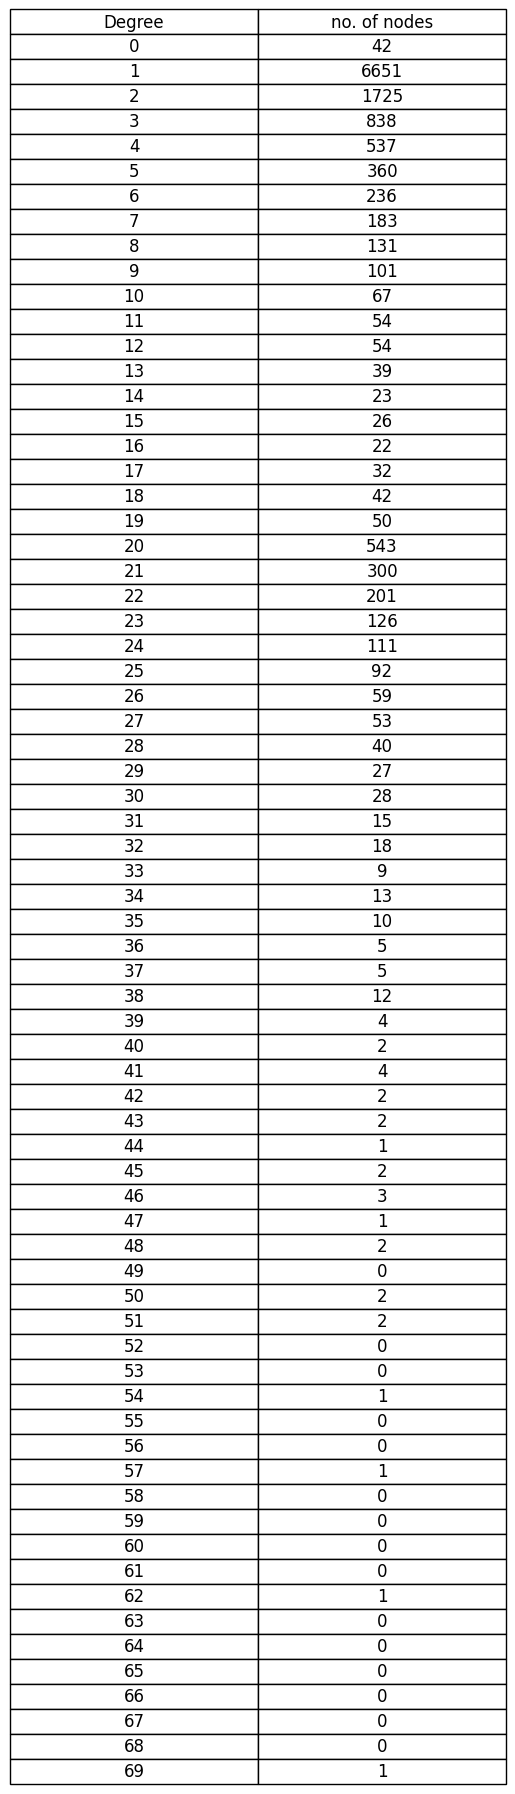

In [12]:
degree_hist = nx.degree_histogram(G)
table_data = [['Degree', 'no. of nodes']]
for i, freq in enumerate(degree_hist):
    table_data.append([i, freq])

table = plt.table(cellText=table_data, loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  

plt.axis('off')  
plt.show()


By looking at the table, we can say that more than 800 nodes had a degree (number of neighbors) of exactly 3.

Also, there are 1 nodes with degree 69 and 2 nodes with degree 51.

C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 37165 (\N{CJK UNIFIED IDEOGRAPH-912D}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 37406 (\N{CJK UNIFIED IDEOGRAPH-921E}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 40657 (\N{CJK UNIFIED IDEOGRAPH-9ED1}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35961 (\N{CJK UNIFIED IDEOGRAPH-8C79}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32645 (\N{CJK UNIFIED IDEOGRAPH-7F85}) m

C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47680 (\N{HANGUL SYLLABLE MEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  func(*arg

C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current 

C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12369 (\N{HIRAGANA LETTER KE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12420 (\N{HIRAGANA LETTER YA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 22338 (\N{CJK UNIFIED IDEOGRAPH-5742}) missing from current font.
  func(*args, **kwargs)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26954 (\N{CJK UNIFIED IDEOGRAPH-694A}) missing from current font

C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31461 (\N{CJK UNIFIED IDEOGRAPH-7AE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24043 (\N{CJK UNIFIED IDEOGRAPH-5DEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-pac

C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23470 (\N{CJK UNIFIED IDEOGRAPH-5BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20063 (\N{CJK UNIFIED IDEOGRAPH-4E5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-pac

C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47680 (\N{HANGUL SYLLABLE MEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools

C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py

C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38899 (\N{CJK UNIFIED IDEOGRAPH-97F3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38425 (\N{CJK UNIFIED IDEOGRAPH-9619}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35799 (\N{CJK UNIFIED IDEOGRAPH-8BD7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21548 (\N{CJK UNIFIED IDEOGRAPH-542C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Mariam\AppData\Local\Programs\Python\Python311\Lib\site-pac

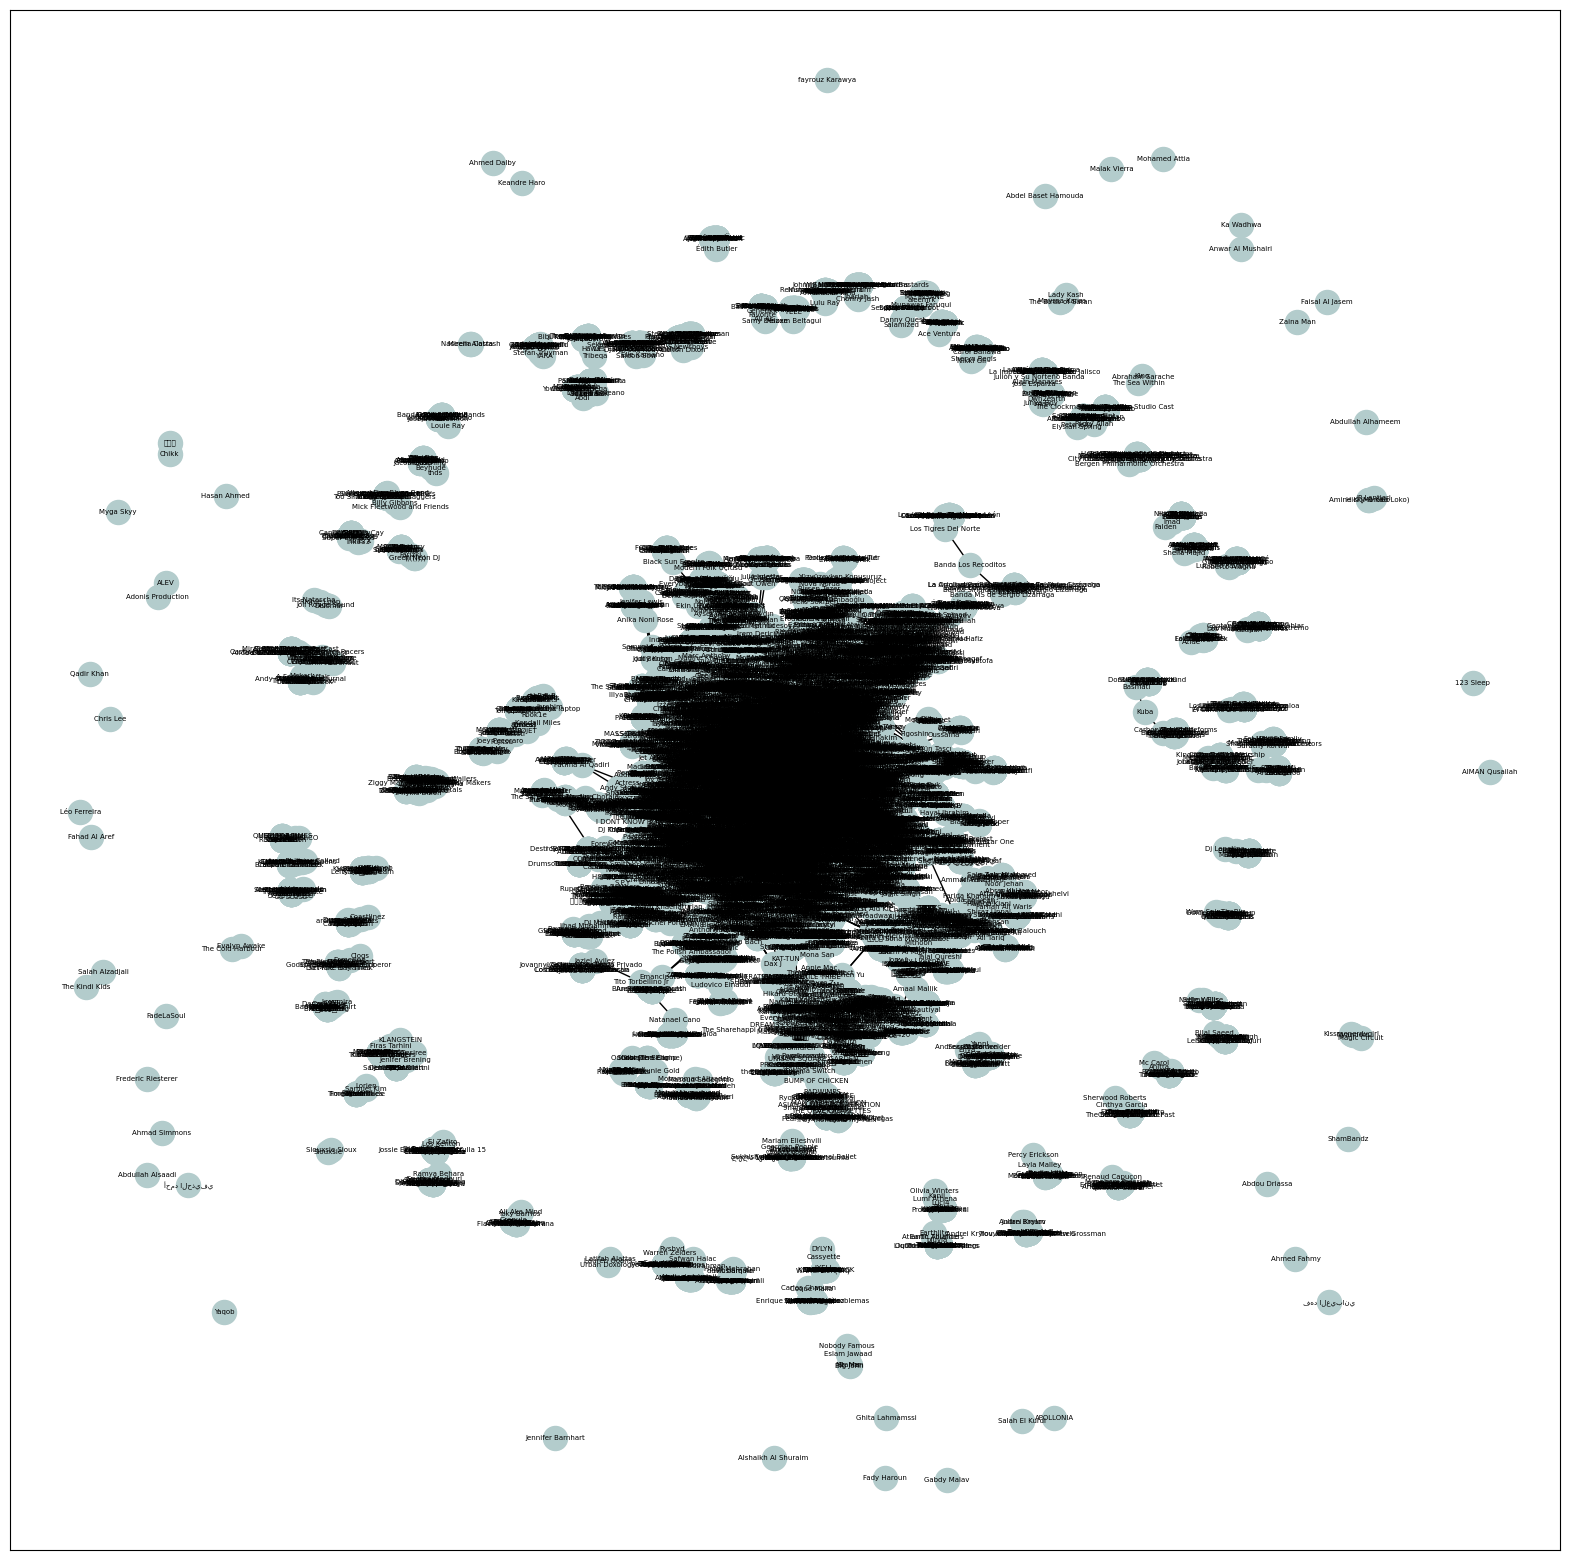

In [16]:
np.random.seed(0)
plt.figure(figsize=(20,20))
nx.draw_networkx(G, with_labels=True, node_color=(.7,.8,.8), font_size=5)